In [21]:
# Seeing if medical personel handwashing is important during childbirth
import pandas as pd
import numpy as np
%matplotlib inline
# Read datasets
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])
display(monthly.head())
yearly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Text(0,0.5,'Proportion Deaths')

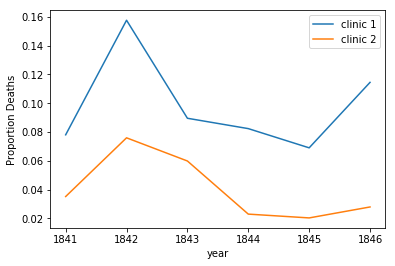

In [22]:
# Deaths per births per year
yearly['proportion_deaths'] = yearly.deaths / yearly.births
# Separate clinics to compare performance
yearly1 = yearly[yearly.clinic=='clinic 1']
yearly2 = yearly[yearly.clinic=='clinic 2']

# Plot comparision
ax = yearly1.plot('year', 'proportion_deaths', label='clinic 1')
yearly2.plot('year', 'proportion_deaths', label='clinic 2', ax=ax)
ax.set_ylabel('Proportion Deaths')

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


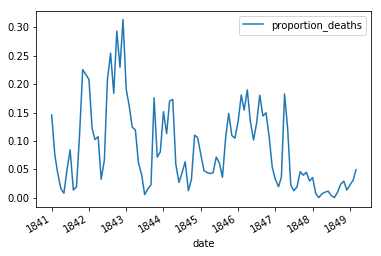

In [23]:
# Deaths per births per month
# Recall no separate clinic col
monthly['proportion_deaths']= monthly.deaths / monthly.births
display(monthly.head())

ax = monthly.plot('date','proportion_deaths')
ax.ylabel = 'Proportion deaths'

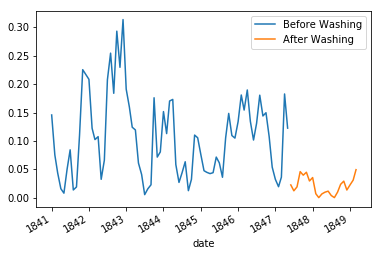

In [24]:
# Handwashing mandatory in June 1841
handwashing_start = pd.to_datetime('1847-06-01')

# Splitting set between handwashing date
before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]

ax = before_washing.plot('date', 'proportion_deaths', label ='Before Washing')
after_washing.plot('date', 'proportion_deaths', label= 'After Washing', ax=ax)
ax.ylabel='Proportion Deaths'

In [25]:
# Difference in mean monthly deaths
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

In [26]:
# Experimenting with bootstrap analysis
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean()- boot_before.mean())

bs_rep = np.empty(3000)
for i in range(3000):
    bs_rep[i] = np.random.choice(after_proportion, len(after_proportion)).mean()
    - np.random.choice(before_proportion, len(before_proportion)).mean()
print(np.percentile(bs_rep, [2.5, 97.5]))
# Checking confidence interval which says that our 8% change is probable
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


[0.01512712 0.02733264]


0.025   -0.100851
0.975   -0.067535
dtype: float64